In [28]:
print("sahil taksal")

sahil taksal


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df = pd.read_csv("Housing.csv")

In [8]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [9]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [10]:

df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [11]:
x = df.drop(['price'], axis=1)
y = df['price']

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest =train_test_split(x, y, test_size =0.2,random_state = 0)

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['mainroad'] = le.fit_transform(df['mainroad'])
newdf=df

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['guestroom'] = le.fit_transform(df['guestroom'])
newdf=df

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['prefarea'] = le.fit_transform(df['prefarea'])
newdf=df

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['airconditioning'] = le.fit_transform(df['airconditioning'])
newdf=df

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)  
y = df['price']  

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

lm = LinearRegression()
lm.fit(X_train, Y_train)


LinearRegression()

In [18]:
Y_pred = lm.predict(X_test)
print("Predictions:", Y_pred)

Predictions: [5164653.90033967 7224722.29802166 3109863.24240338 4612075.3272256
 3294646.25725955 3532275.09556559 5611774.56836476 6368145.98732718
 2722856.95689985 2629405.61585782 9617039.5031558  2798087.30447888
 3171096.76847063 3394639.09125528 3681088.65424275 5263187.74621485
 3035963.47612384 4786122.8004005  4349551.9200572  3572362.09930451
 5774875.21395649 5886993.57919884 2730836.19518458 4727316.47323635
 5244847.52716801 7555324.21605603 3220790.84680268 5191898.79934206
 8143726.91009786 3398814.09825035 6490693.05027925 3315105.9074781
 6708457.36761326 4201738.21071676 3557571.06735186 5836974.50478626
 4808660.67448475 4362878.73613261 3191242.95701508 4596554.93225238
 4566042.86048411 3517779.52374148 7205844.79365835 3983597.27861103
 3749338.70271056 4274731.09125896 6757442.10783741 4037320.43665851
 3769334.90397126 3417627.44377156 7268416.67644611 2802534.35431384
 4341750.61420452 4516422.15345642 3679997.65037847 2678959.06481152
 7498029.17782458 29203

In [20]:
import sklearn
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model=lm.fit(X_train, Y_train)

In [21]:
Ytrain_pred = lm.predict(X_train)
Ytest_pred = lm.predict(X_test)


In [22]:
df=pd.DataFrame(Ytrain_pred,Y_train)
df=pd.DataFrame(Ytest_pred,Y_test)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, Ytest_pred)
print(mse)
mse = mean_squared_error(Ytrain_pred,Y_train)
print (mse)

1754318687330.6638
968358188440.7242


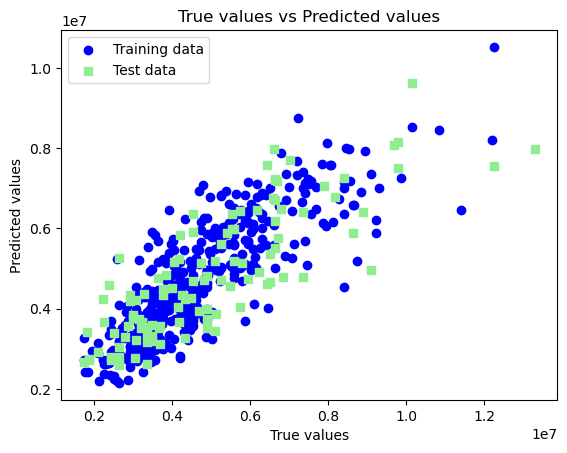

In [24]:
plt.scatter(Y_train, Ytrain_pred, c='blue', marker='o', label='Training data')
plt.scatter(Y_test, Ytest_pred, c='lightgreen', marker='s', label='Test data')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title("True values vs Predicted values")
plt.legend(loc='upper left')
plt.show()
